In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-stores-sales/sales.csv


# 1. Data Preparation

# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/us-stores-sales/sales.csv')
df

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular


In [9]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [37]:
df['Date']=pd.to_datetime(df['Date'])

/tmp/ipykernel_42/3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [9]:
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

# 2. Visualizaion

<Axes: xlabel='Profit', ylabel='Count'>

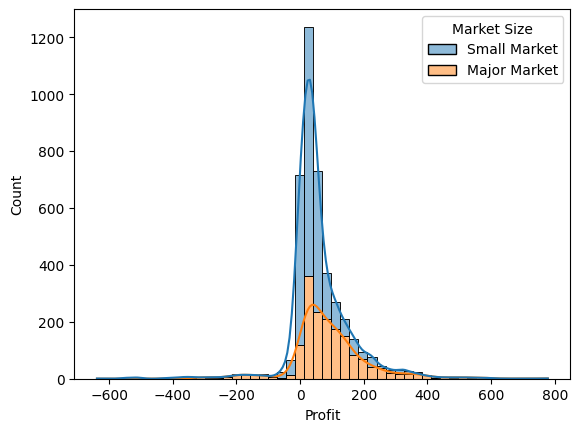

In [32]:
sns.histplot(data=df,x='Profit',hue='Market Size',bins=50,kde=True,multiple='stack')

<Axes: xlabel='Sales', ylabel='Count'>

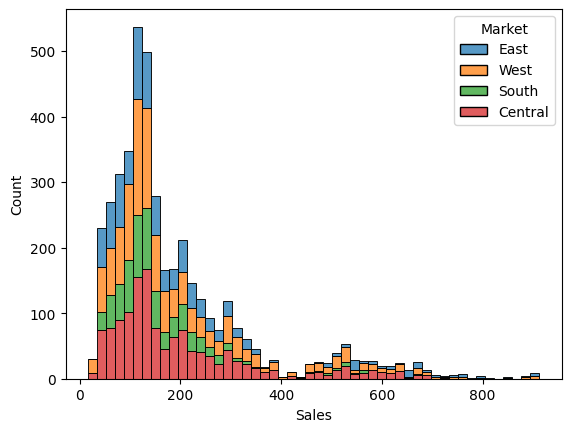

In [36]:
sns.histplot(data=df,x='Sales',hue='Market',bins=50,multiple='stack')

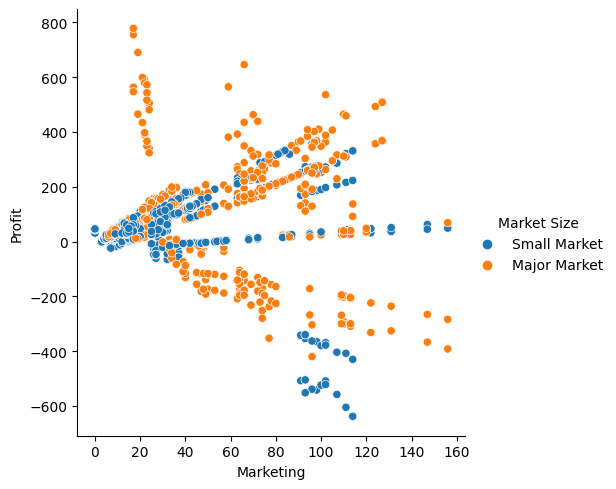

In [37]:
sns.relplot(x=df['Marketing'],y=df['Profit'],hue='Market Size',data=df)

In [6]:
df['Market Size'].value_counts()

Market Size
Small Market    2544
Major Market    1704
Name: count, dtype: int64

In [3]:
market=df.groupby('Market Size')

In [5]:
market.Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Market Size,,,,,,,,
Major Market,1704.0,249.495892,174.513272,41.0,125.0,199.0,301.0,912.0
Small Market,2544.0,155.137579,119.073993,17.0,85.0,122.0,171.0,716.0


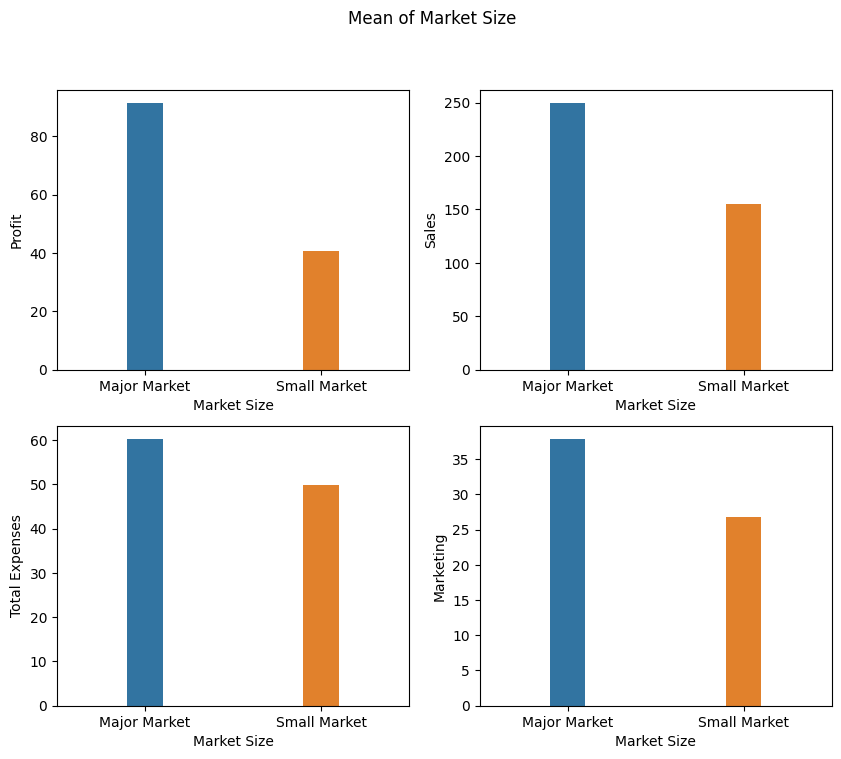

In [20]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
plt.figure(figsize=(10,8))
plt.suptitle("Mean of Market Size")
for i in cols:
    plt.subplot(2,2,k)
    sns.barplot(data=pd.DataFrame(df.groupby('Market Size')[i].mean()).reset_index(),
                             x='Market Size',y=i,width=0.2)
    

    k+=1

In [78]:
df.groupby(['Market Size','State']).agg({
    'Profit':'mean','Sales':'mean','Marketing':'mean','Total Expenses':'mean'
})

Profit       Sales  Marketing  Total Expenses
Market Size  State                                                           
Major Market California     110.364583  336.430556  55.770833       80.631944
             Colorado        67.208333  182.496212  25.795455       45.996212
             Florida         56.990741  173.347222  29.092593       50.967593
             Illinois       142.689815  323.532407  41.490741       63.208333
             Massachusetts  114.180556  208.090278  23.805556       46.979167
             New York       104.666667  369.020833  67.937500       91.859375
             Ohio            49.875000  159.800926  23.916667       47.458333
             Texas           93.845238  222.678571  28.250000       47.619048
Small Market Connecticut     45.363095  151.363095  24.880952       48.190476
             Iowa           102.833333  253.472222  35.157407       54.805556
             Louisiana       43.779762  137.863095  22.559524       42.750000
             Missouri        16.671296  114.106481  20.037037       44.634259
             Nevada          40.212121  227.875000  45.666667       70.401515
             New Hampshire   16.357143   88.613095  14.916667       39.321429
             New Mexico       4.755952   94.595238  18.107143       43.113095
             Oklahoma        50.940476  163.470238  29.666667       51.053571
             Oregon          47.117424  154.920455  22.825758       47.151515
             Utah            26.913194  122.861111  19.687500       43.086806
             Washington      47.520833  162.208333  30.183333       53.537500
             Wisconsin       40.287037  153.097222  30.333333       53.273148

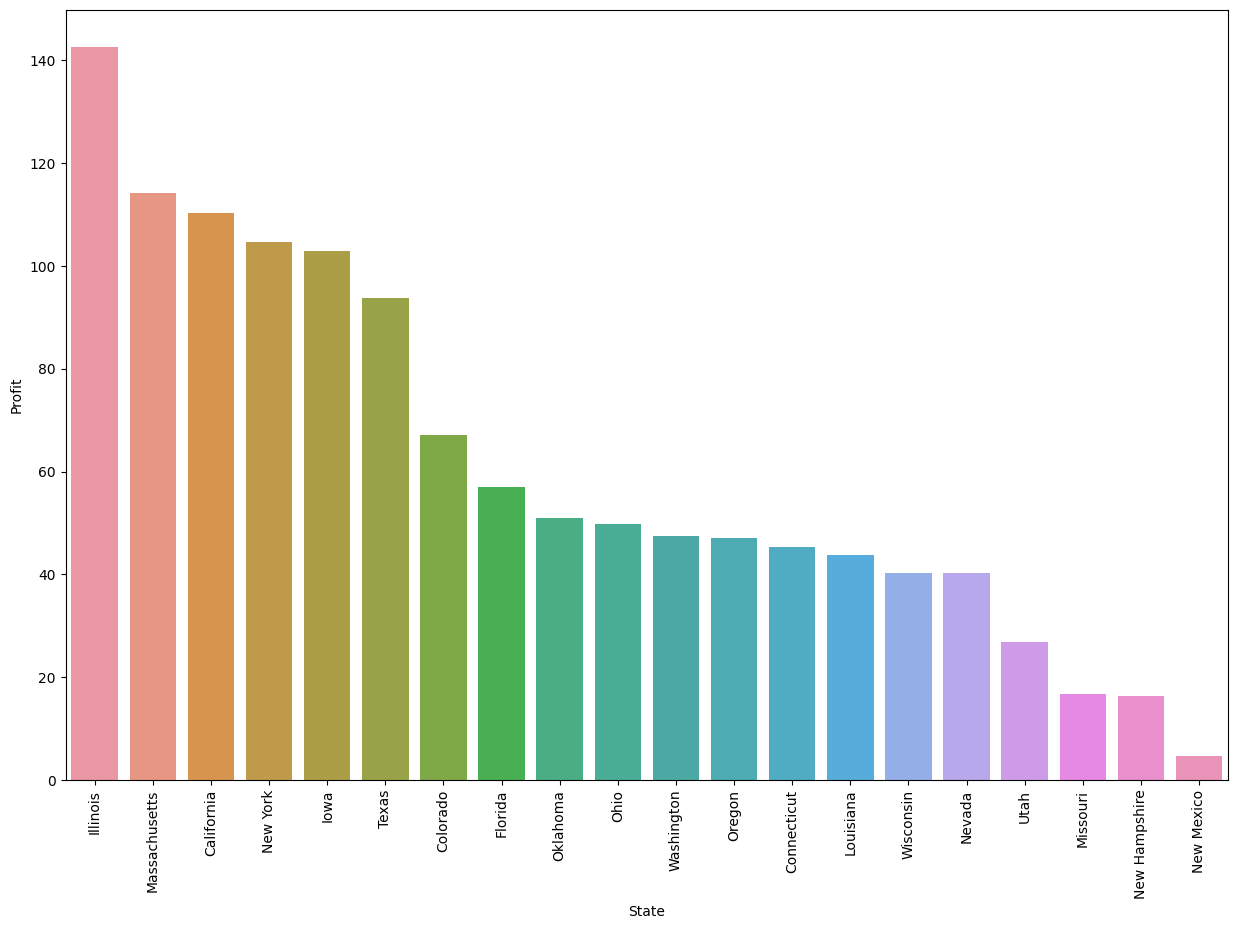

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(df.groupby(['State'])['Profit'].mean()).reset_index().sort_values('Profit',ascending=False),
                             x='State',y='Profit')
plt.xticks(rotation=90)

plt.show()

In [53]:
df[(df['State']=='Illinois') & (df['Profit']==df[df['State']=='Illinois'].Profit.max())]
                 

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
3195,773,Illinois,Central,Major Market,362.0,392.0,681.0,295.0,121.0,97.0,1714.0,340.0,340.0,470.0,810.0,5,08/01/11 00:00:00,Espresso,Caffe Mocha,Regular


<Axes: >

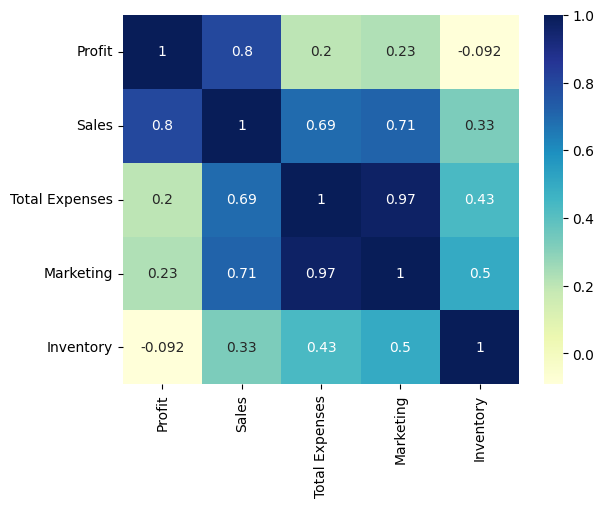

In [51]:
sns.heatmap(df[['Profit','Sales','Total Expenses','Marketing','Inventory']].corr(),annot=True,cmap='YlGnBu')

Text(0.5, 1.0, 'Total Expenses vs Sales')

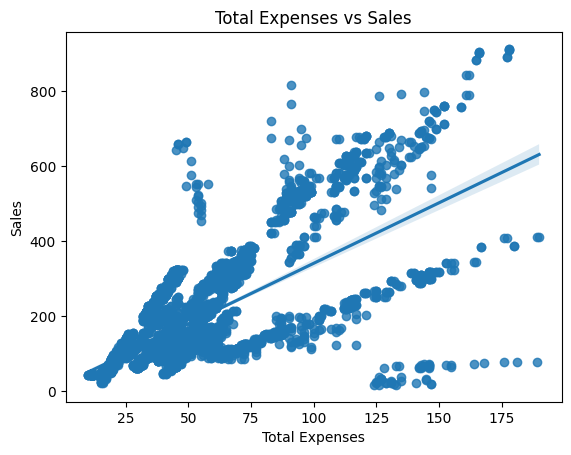

In [47]:
sns.regplot(x=df['Total Expenses'],y=df['Sales'])
plt.title('Total Expenses vs Sales')

Text(0.5, 1.0, 'Marketing vs Profit')

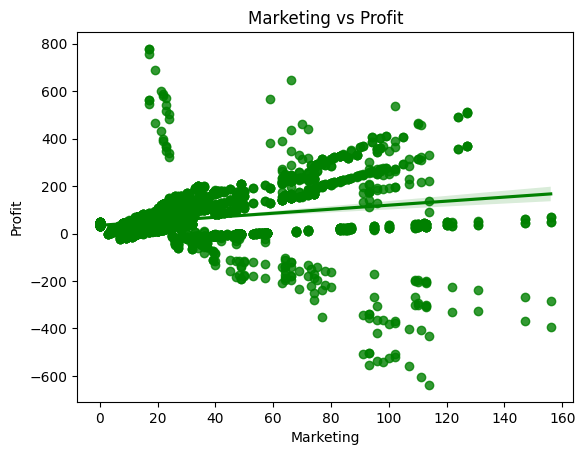

In [48]:
sns.regplot(x=df['Marketing'],y=df['Profit'],color='g')
plt.title('Marketing vs Profit')

<Axes: xlabel='Inventory', ylabel='Sales'>

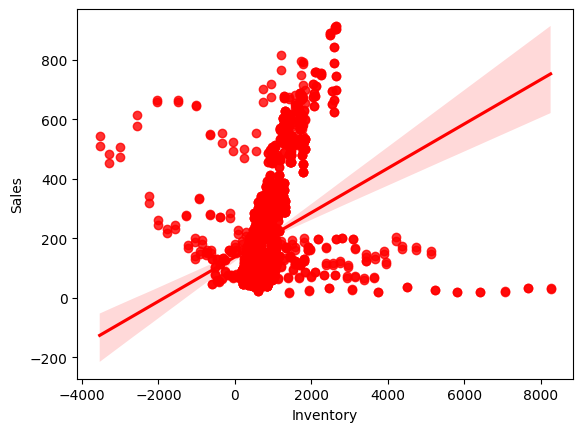

In [53]:
sns.regplot(x=df['Inventory'],y=df['Sales'],color='r')

In [80]:
df.Type.value_counts()

Type
Regular    2400
Decaf      1848
Name: count, dtype: int64

In [82]:
df.Market.value_counts()

Market
West       1344
Central    1344
East        888
South       672
Name: count, dtype: int64

In [87]:
d=df.groupby(['State','Market','Market Size']).agg({
    'Profit':'mean','Sales':'mean','Marketing':'mean','Total Expenses':'mean'
}).reset_index()
d

,State,Market,Market Size,Profit,Sales,Marketing,Total Expenses
0,California,West,Major Market,110.364583,336.430556,55.770833,80.631944
1,Colorado,Central,Major Market,67.208333,182.496212,25.795455,45.996212
2,Connecticut,East,Small Market,45.363095,151.363095,24.880952,48.190476
3,Florida,East,Major Market,56.990741,173.347222,29.092593,50.967593
4,Illinois,Central,Major Market,142.689815,323.532407,41.490741,63.208333
5,Iowa,Central,Small Market,102.833333,253.472222,35.157407,54.805556
6,Louisiana,South,Small Market,43.779762,137.863095,22.559524,42.750000
7,Massachusetts,East,Major Market,114.180556,208.090278,23.805556,46.979167
8,Missouri,Central,Small Market,16.671296,114.106481,20.037037,44.634259
9,Nevada,West,Small Market,40.212121,227.875000,45.666667,70.401515


In [88]:
d[d['State']=='California']

,State,Market,Market Size,Profit,Sales,Marketing,Total Expenses
0,California,West,Major Market,110.364583,336.430556,55.770833,80.631944


In [36]:
pd.DataFrame(np.where(df['Margin']==df['Sales']-df['COGS'],True,False)).value_counts()

True     2160
False    2088
Name: count, dtype: int64

In [38]:
pd.DataFrame(np.where(df['Budget Margin']==df['Budget Sales']-df['Budget COGS'],True,False)).value_counts()

True    4248
Name: count, dtype: int64

In [19]:
test2

,Market Size,Profit,Budget Profit,Sales,Budget Sales,Margin,Budget Margin
130,Major Market,-84.0,-80.0,106.0,130.0,-21.0,-30.0
131,Major Market,-138.0,-150.0,87.0,100.0,-67.0,-90.0
132,Major Market,-3.0,30.0,162.0,180.0,50.0,70.0
133,Major Market,-131.0,-90.0,109.0,120.0,-25.0,-30.0
134,Major Market,276.0,400.0,712.0,890.0,428.0,540.0
...,...,...,...,...,...,...,...
4213,Major Market,250.0,340.0,678.0,840.0,367.0,450.0
4214,Major Market,155.0,120.0,254.0,220.0,152.0,140.0
4215,Major Market,85.0,90.0,199.0,170.0,118.0,110.0
4216,Major Market,28.0,30.0,92.0,90.0,55.0,60.0


In [24]:
df[df['Market']=='West']['Market Size'].value_counts()

Market Size
Small Market    1056
Major Market     288
Name: count, dtype: int64

In [35]:
data=df.groupby(['Market Size','Product Type']).agg({'Profit':'mean','Sales':'mean','Margin':'mean'}).reset_index()
           

In [33]:
data

,Market Size,Product Type,Profit,Sales,Margin
0,Major Market,Coffee,130.220588,313.718137,177.622549
1,Major Market,Espresso,99.099537,308.020833,162.194444
2,Major Market,Herbal Tea,63.651316,205.085526,104.381579
3,Major Market,Tea,75.416667,172.941176,99.637255
4,Small Market,Coffee,33.260802,137.084877,75.774691
5,Small Market,Espresso,34.689516,120.875000,68.688172
6,Small Market,Herbal Tea,57.048333,189.491667,104.003333
7,Small Market,Tea,40.246377,185.168478,89.931159


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

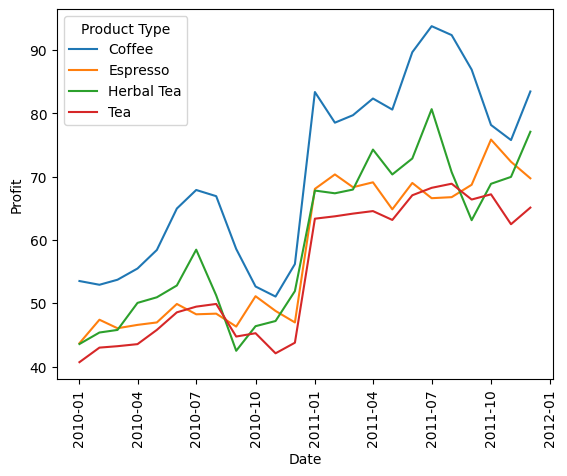

In [51]:
sns.lineplot(data=pd.DataFrame(df.groupby(['Product Type','Date'])['Profit'].mean()).reset_index(),x='Date',y='Profit',hue='Product Type')
plt.xticks(rotation=90)
plt.show()

In [103]:
def plotdata(data):
    k=1
    print('Major Market')
    plt.figure(figsize=(15,8))
    for i in data.columns[2:]:
       
        plt.subplot(1,3,k)
        
        sns.barplot(data=data[data['Market Size']=='Major Market'],x='Product Type',y=i,width=0.2)
        plt.title(i)

        k+=1
    k=1
 
    print('Small Market')
    for i in data.columns[2:]:
        plt.figure(figsize=(15,8))
        plt.subplot(1,3,k)
        
        sns.barplot(data=data[data['Market Size']=='Small Market'],x='Product Type',y=i,width=0.2)
        plt.title(i)
        k+=1

    
    

Major Market


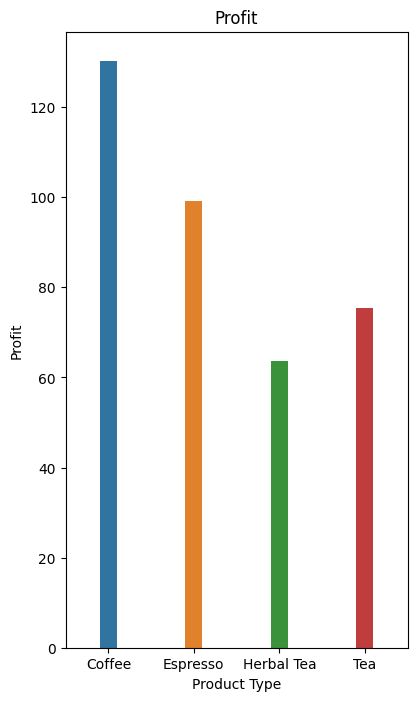

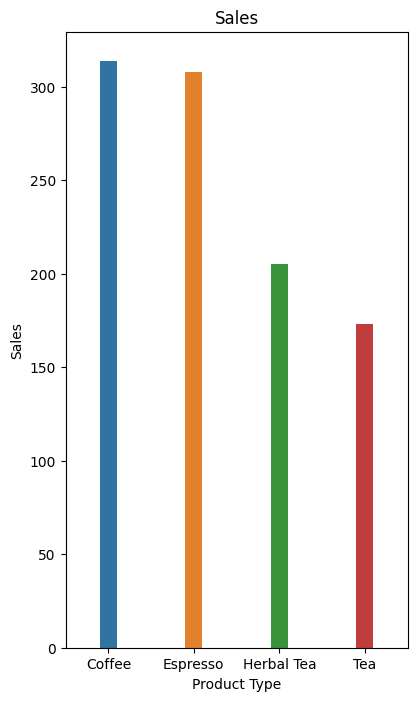

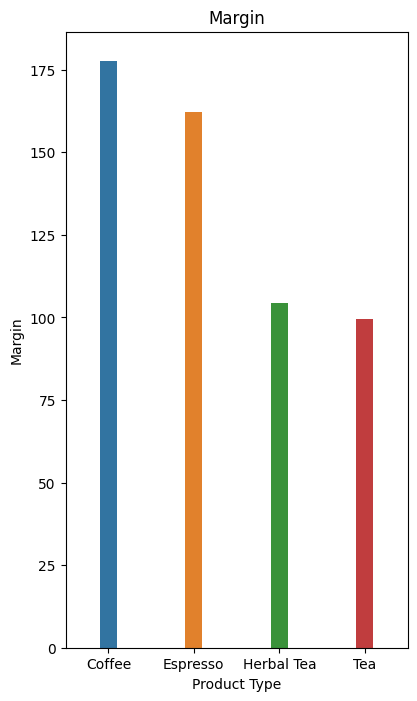

Small Market


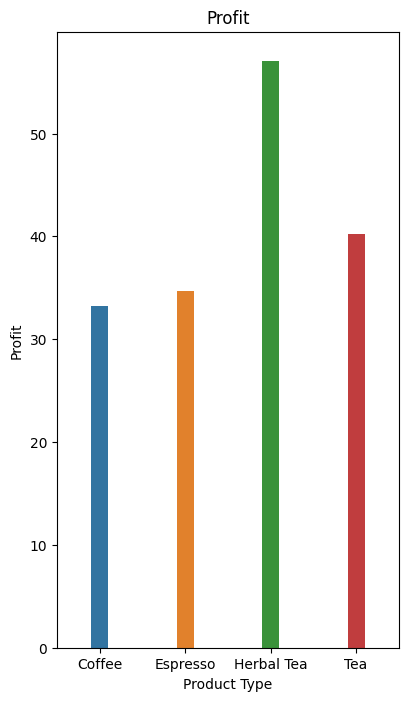

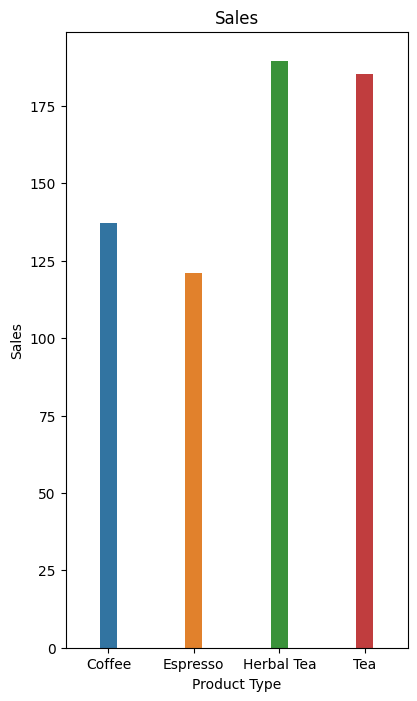

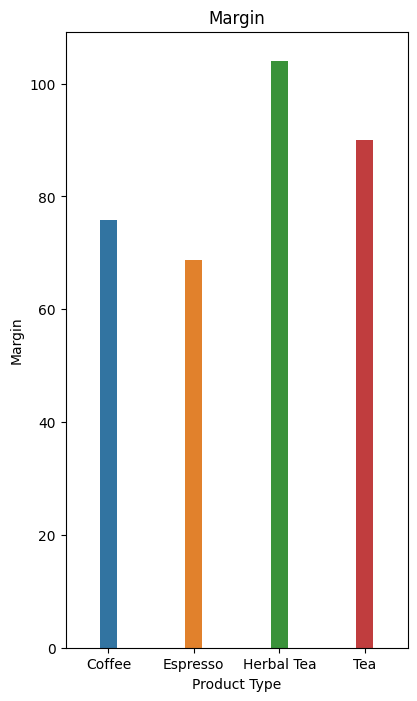

In [104]:
plotdata(data)

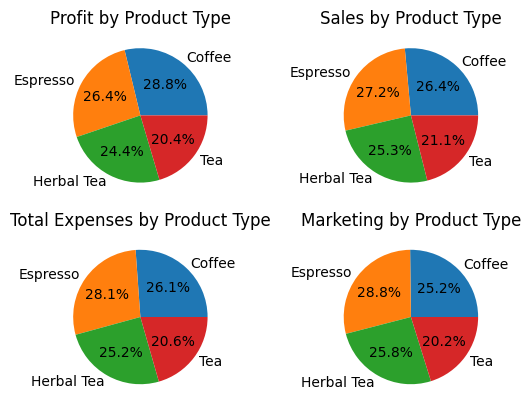

In [59]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
for i in cols:
    plt.subplot(2,2,k)
    product_profit = df.groupby('Product Type')[i].sum()

    product_profit.plot.pie(autopct='%1.1f%%')
    k+=1
    plt.title(f'{i} by Product Type')

    plt.ylabel('')

In [13]:
df.Product.value_counts()

Product
Columbian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Darjeeling           384
Decaf Irish Cream    384
Chamomile            384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Mint                 192
Amaretto             192
Regular Espresso      72
Name: count, dtype: int64

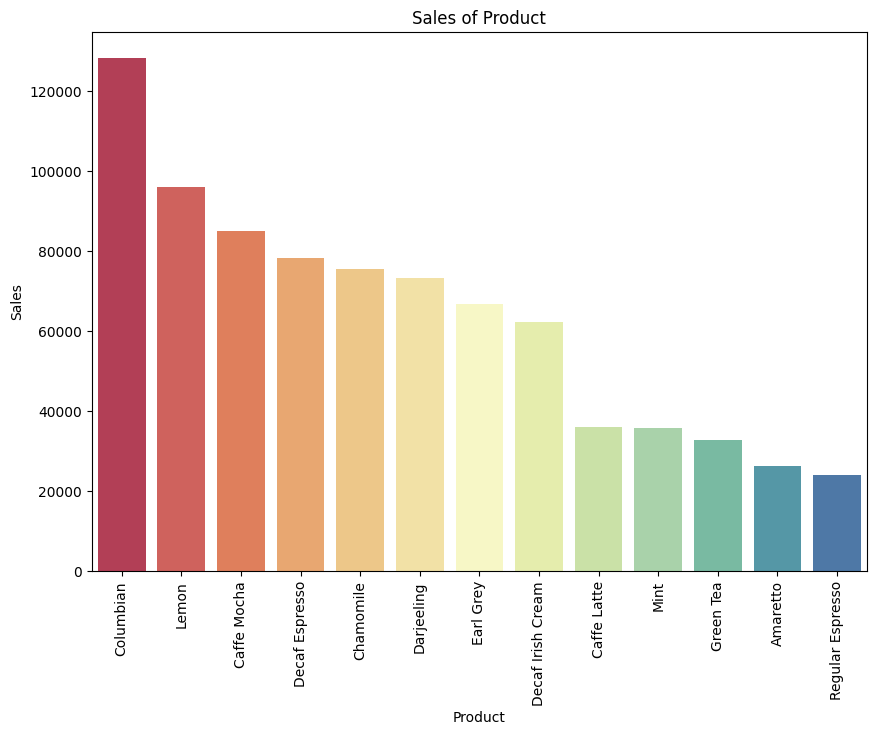

In [106]:
plt.figure(figsize=(10,7))
sns.barplot(data=pd.DataFrame(df.groupby('Product')['Sales'].sum()).reset_index().sort_values('Sales',ascending=False),x='Product',y='Sales',palette='Spectral')
plt.xticks(rotation=90)
plt.title('Sales of Product')
plt.show()

In [29]:
df[(df['Product']=='Columbian') & (df['Sales']==df[df['Product']=='Columbian']['Sales'].max())]


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2815,707,California,West,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,530.0,450.0,690.0,1140.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
3612,845,New York,East,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,370.0,340.0,520.0,860.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular


In [34]:
df[(df['Product']=='Regular Espresso') & (df['Sales']==df[df['Product']=='Regular Espresso']['Sales'].min())]

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2387,603,New Hampshire,East,Small Market,-16.0,25.0,45.0,20.0,41.0,7.0,218.0,0.0,10.0,30.0,40.0,7,12/01/10 00:00:00,Espresso,Regular Espresso,Regular


In [128]:
df[df['Sales']==df['Sales'].max()]

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
2815,707,California,West,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,530.0,450.0,690.0,1140.0,2,2010-07-01,Coffee,Columbian,Regular
3612,845,New York,East,Major Market,370.0,548.0,912.0,364.0,178.0,127.0,2654.0,370.0,340.0,520.0,860.0,2,2010-07-01,Coffee,Columbian,Regular


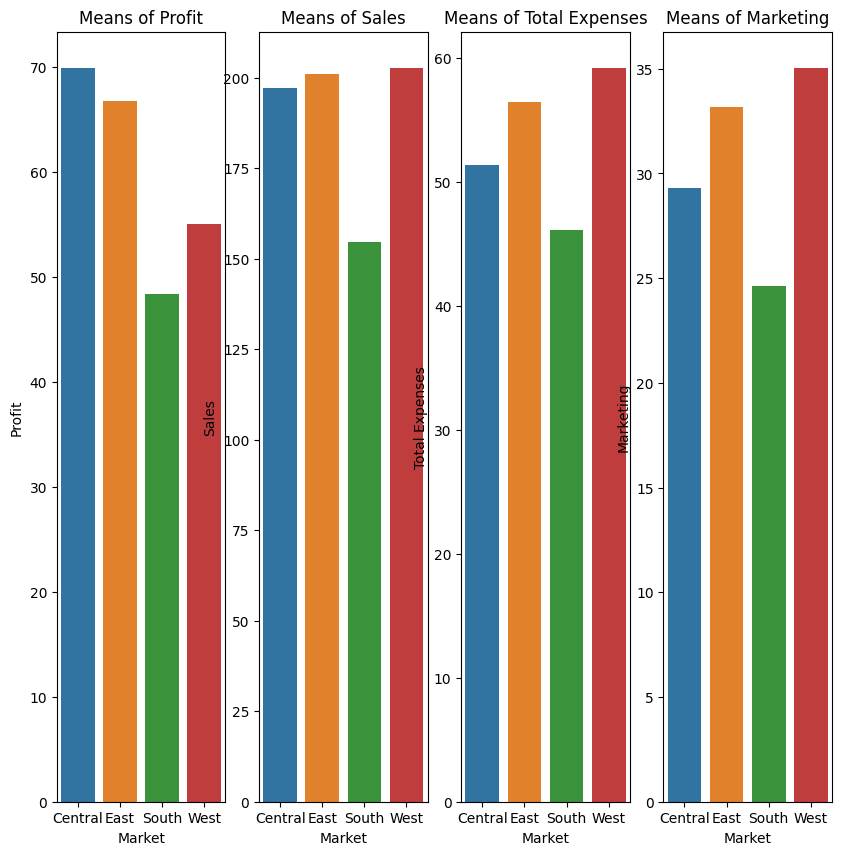

In [27]:
cols=['Profit','Sales','Total Expenses','Marketing']
k=1
plt.figure(figsize=(10,10))
for i in cols:
    plt.subplot(1,4,k)
    sns.barplot(data=pd.DataFrame(df.groupby('Market')[i].mean()).reset_index(),x='Market',y=i)
    plt.title(f'Means of {i}')
    k+=1
    
                                                      
# plt.subplot(1,2,1)
# sns.barplot(data=pd.DataFrame(df.groupby('Market').Profit.mean()).reset_index(),x='Market',y='Profit')
# plt.title('Mean of Profit')
# plt.subplot(1,2,2)
# sns.barplot(data=pd.DataFrame(df.groupby('Market').Sales.mean()).reset_index(),x='Market',y='Sales',)
# plt.title('Mean of Sales')

# 3.Testing A/B

In [12]:
from scipy.stats import ttest_ind


In [18]:
def test(df):
    print(f'Test in {df.iloc[0][0]}!')
    print('-----------------')
    for i in range(1,len(df.columns[1:]),2):
        
        stat,p_value=ttest_ind(df[df.columns[i]],df[df.columns[i+1]],alternative='greater')
        if p_value<0.05:
            print(f'{df.columns[i]} is so great!'
                 )
        else:
            print(f'{df.columns[i]} is unexpected!')

In [4]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [22]:
test1=df[df['Market Size']=='Major Market'][['Market Size','Profit','Budget Profit','Sales','Budget Sales','Margin','Budget Margin']]
test2=df[df['Market Size']=='Small Market'][['Market Size','Profit','Budget Profit','Sales','Budget Sales','Margin','Budget Margin']]

In [20]:
test1

,Market Size,Profit,Budget Profit,Sales,Budget Sales,Margin,Budget Margin
130,Major Market,-84.0,-80.0,106.0,130.0,-21.0,-30.0
131,Major Market,-138.0,-150.0,87.0,100.0,-67.0,-90.0
132,Major Market,-3.0,30.0,162.0,180.0,50.0,70.0
133,Major Market,-131.0,-90.0,109.0,120.0,-25.0,-30.0
134,Major Market,276.0,400.0,712.0,890.0,428.0,540.0
...,...,...,...,...,...,...,...
4213,Major Market,250.0,340.0,678.0,840.0,367.0,450.0
4214,Major Market,155.0,120.0,254.0,220.0,152.0,140.0
4215,Major Market,85.0,90.0,199.0,170.0,118.0,110.0
4216,Major Market,28.0,30.0,92.0,90.0,55.0,60.0


In [19]:
test(test1)

Test in Major Market!
-----------------
Profit is unexpected!
Sales is so great!
Margin is unexpected!


In [23]:
test2

,Market Size,Profit,Budget Profit,Sales,Budget Sales,Margin,Budget Margin
0,Small Market,107.0,110.0,292.0,270.0,176.0,160.0
1,Small Market,75.0,90.0,225.0,210.0,135.0,130.0
2,Small Market,122.0,130.0,325.0,290.0,195.0,180.0
3,Small Market,105.0,110.0,289.0,260.0,174.0,160.0
4,Small Market,104.0,90.0,223.0,210.0,135.0,130.0
...,...,...,...,...,...,...,...
4243,Small Market,-6.0,0.0,113.0,90.0,66.0,50.0
4244,Small Market,-7.0,10.0,105.0,90.0,61.0,60.0
4245,Small Market,-3.0,0.0,131.0,100.0,76.0,60.0
4246,Small Market,1.0,0.0,160.0,120.0,87.0,70.0


In [24]:
test(test2)

Test in Small Market!
-----------------
Profit is unexpected!
Sales is so great!
Margin is so great!


# 4.Predict Model

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [8]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [5]:
X=df[['Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',]]
y=df['Market Size']

In [6]:
X

,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales
0,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0
1,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0
2,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0
3,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0
4,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...
4243,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0
4244,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0
4245,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0
4246,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0


In [13]:
y

0       Small Market
1       Small Market
2       Small Market
3       Small Market
4       Small Market
            ...     
4243    Small Market
4244    Small Market
4245    Small Market
4246    Small Market
4247    Small Market
Name: Market Size, Length: 4248, dtype: object

In [15]:

y.apply(lambda x:1 if x=='Major Market'else 0)

0       0
1       0
2       0
3       0
4       0
       ..
4243    0
4244    0
4245    0
4246    0
4247    0
Name: Market Size, Length: 4248, dtype: int64

In [60]:
model={
    'RandomForest':[RandomForestClassifier(random_state=42,max_depth=10)],
    'Logistic':[LogisticRegression(random_state=42)],
    'SVC':[SVC(random_state=42)]
}

In [52]:
model

{'RandomForest': RandomForestClassifier(max_depth=10, random_state=42),
 'Logistic': LogisticRegression(random_state=42),
 'SVC': SVC(random_state=42)}

In [62]:
for x in model:
    model[x][0].fit(X_train,y_train)

    model[x].append(model[x][0].score(X_test,y_test))
    model[x].remove(model[x][0])


 
    
    

In [64]:
pd.DataFrame(data=model,index=['Accuacy Score'])

,RandomForest,Logistic,SVC
Accuacy Score,0.881356,0.709981,0.759887


In [7]:
from tensorflow import keras
from tensorflow.keras import layers


In [71]:
X_scale=StandardScaler().fit_transform(X)
X_train_full,X_test,y_train_full,y_test=train_test_split(X_scale,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [30]:
y_train

1829    1
976     1
3935    1
3240    1
3441    1
       ..
3444    1
466     1
3092    1
3772    1
860     1
Name: Market Size, Length: 3186, dtype: int64

In [60]:
md=keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=[len(X.columns)]),
#     layers.Dense(256,activation='relu'),
#     layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


In [27]:
y=y.apply(lambda x:0 if x=='Small Market' else 1)

In [72]:
# md.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
md.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
md.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
75/75 [==============================] - 1s 5ms/step - loss: 7.6755e-05 - binary_accuracy: 1.0000 - val_loss: 2.8099e-05 - val_binary_accuracy: 1.0000
Epoch 2/5
75/75 [==============================] - 0s 3ms/step - loss: 1.9079e-05 - binary_accuracy: 1.0000 - val_loss: 1.1363e-05 - val_binary_accuracy: 1.0000
Epoch 3/5
75/75 [==============================] - 0s 3ms/step - loss: 9.3114e-06 - binary_accuracy: 1.0000 - val_loss: 6.4094e-06 - val_binary_accuracy: 1.0000
Epoch 4/5
75/75 [==============================] - 0s 3ms/step - loss: 5.6734e-06 - binary_accuracy: 1.0000 - val_loss: 4.1788e-06 - val_binary_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 0s 3ms/step - loss: 3.8628e-06 - binary_accuracy: 1.0000 - val_loss: 2.9486e-06 - val_binary_accuracy: 1.0000


In [73]:
md.evaluate(X_test,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 3.8524e-06 - binary_accuracy: 1.0000


[3.852351710520452e-06, 1.0]

In [35]:
X_test

array([[ 1.10035474,  2.07467131,  2.32942918, ...,  1.88991142,
         1.6111659 ,  1.84283548],
       [-0.2664563 , -0.32113706, -0.37711277, ..., -0.37491134,
        -0.44085111, -0.44097505],
       [ 0.34320042,  0.29371641,  0.19860642, ...,  0.2290414 ,
         0.42315605,  0.36507573],
       ...,
       [-0.39428755, -0.77697671, -0.91312719, ..., -0.97886407,
        -0.7648538 , -0.91117133],
       [-0.54178515, -0.50135274, -0.59548902, ..., -0.67688771,
        -0.54885201, -0.64248774],
       [ 0.27436821,  0.12410166,  0.14566673, ..., -0.07293497,
         0.09915336,  0.02922124]])

In [65]:
md.predict(X_test)



34/34 [==============================] - 0s 1ms/step


array([[1.        ],
       [0.9999642 ],
       [0.99971557],
       ...,
       [1.        ],
       [0.9999993 ],
       [0.9987663 ]], dtype=float32)

In [44]:
y_test

718     1
3116    1
3061    1
2552    1
120     1
       ..
331     1
342     1
1662    1
479     1
727     1
Name: Market Size, Length: 1062, dtype: int64

In [86]:
k_mean=KMeans(n_clusters=3,n_init=10)
k_mean.fit(df[['Marketing','Profit','Sales']])


KMeans(n_clusters=3, n_init=10)

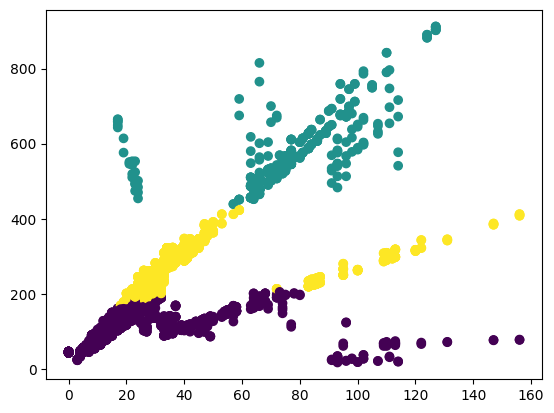

In [88]:
plt.scatter(x=df['Marketing'],y=df['Sales'],c=k_mean.labels_)